In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [17]:
# #
orders = pd.read_csv('data/List of Orders.csv')
orders = orders.dropna(subset=['Order Date'])
orders['Order Date'] = pd.to_datetime(orders['Order Date'], format='%d-%m-%Y')
orders.set_index('Order Date', inplace=True)
# #
order_details = pd.read_csv('data/Order Details.csv')
# #
sales_target = pd.read_csv('data/Sales target.csv')


# 1. График динамики продаж по времени

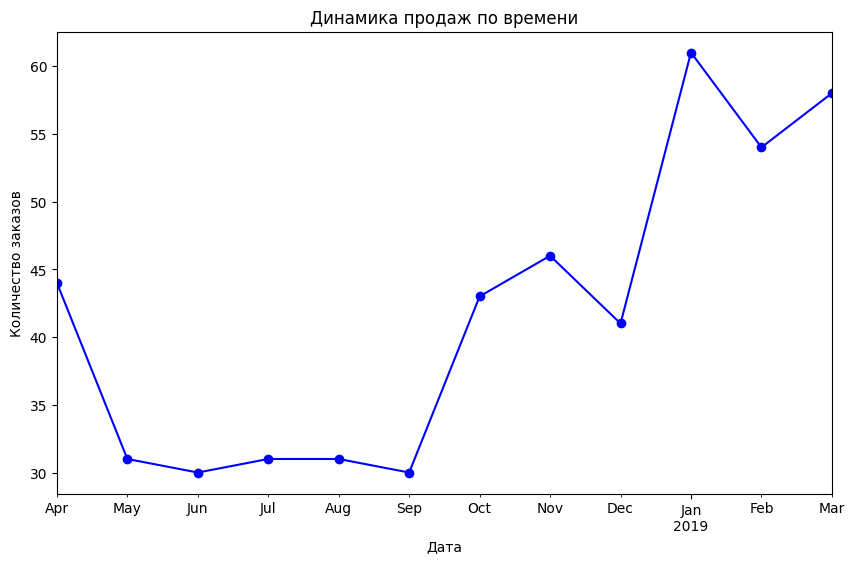

In [11]:
monthly_sales = orders.resample('M').size()
monthly_sales.plot(figsize=(10, 6), marker='o', color='b')
plt.title('Динамика продаж по времени')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.show()

## График позволит нам увидеть динамику продаж с течением времени и выделить сезонные тренды.

# 2. Сравнение прибыли и объема продаж по категориям и подкатегориям

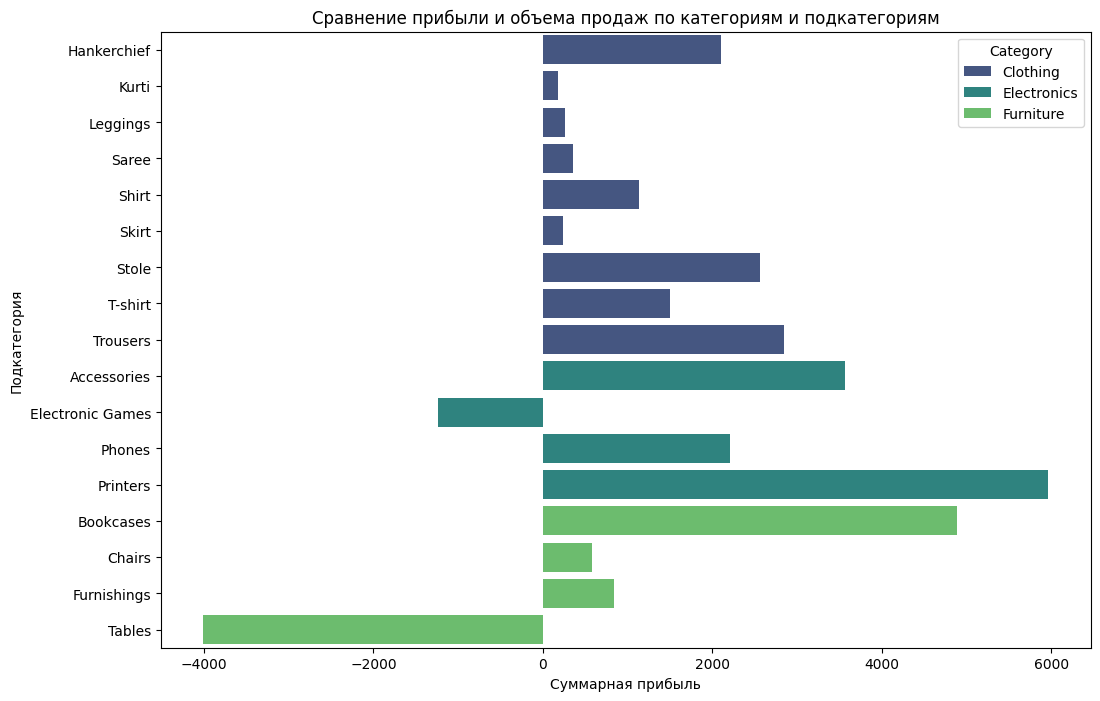

In [16]:
grouped_data = order_details.groupby(['Category', 'Sub-Category']).agg({'Profit': 'sum', 'Quantity': 'sum'}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Profit', y='Sub-Category', hue='Category', data=grouped_data, palette='viridis')
plt.title('Сравнение прибыли и объема продаж по категориям и подкатегориям')
plt.xlabel('Суммарная прибыль')
plt.ylabel('Подкатегория')
plt.show()

##  График показывает, в каких категориях и подкатегориях продажи и прибыль наиболее значительны или, наоборот, могут требовать дополнительного внимания.

# 3. График выполнения продажных планов

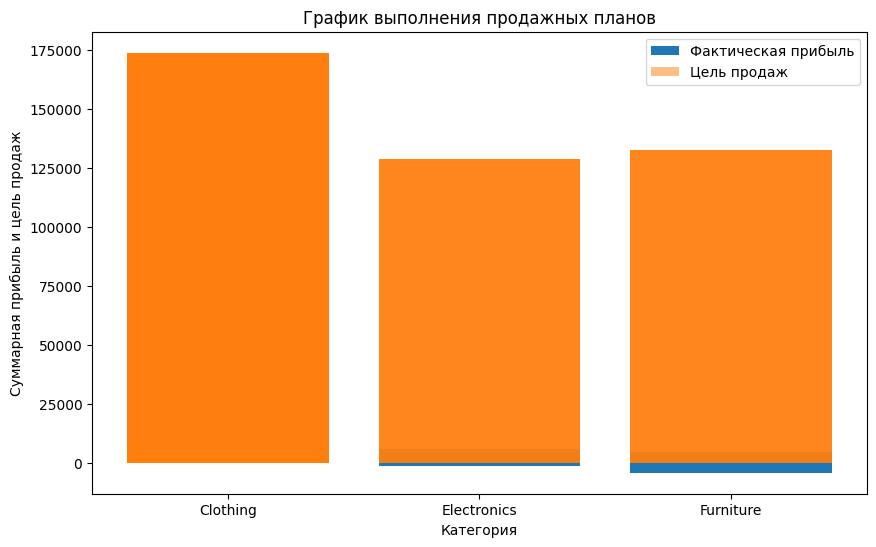

In [18]:
grouped_target = sales_target.groupby('Category').agg({'Target': 'sum'}).reset_index()

merged_data = pd.merge(grouped_data, grouped_target, on='Category')

plt.figure(figsize=(10, 6))
plt.bar(merged_data['Category'], merged_data['Profit'], label='Фактическая прибыль')
plt.bar(merged_data['Category'], merged_data['Target'], label='Цель продаж', alpha=0.5)
plt.title('График выполнения продажных планов')
plt.xlabel('Категория')
plt.ylabel('Суммарная прибыль и цель продаж')
plt.legend()
plt.show()

## График позволит нам оценить, как успешно компания выполняет свои продажные планы по разным категориям.

# 4. Топ-5 клиентов по объему продаж

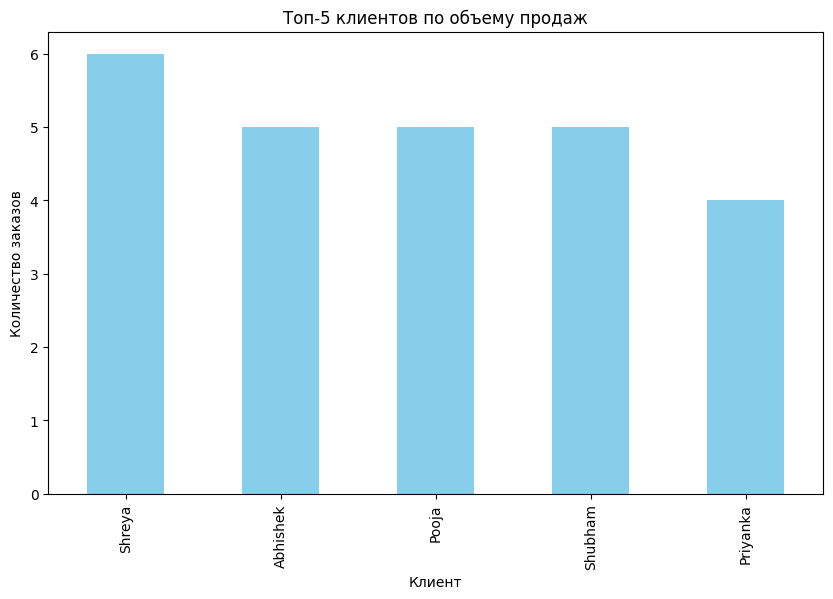

In [19]:
top_customers = orders.groupby('CustomerName')['Order ID'].count().nlargest(5)

plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Топ-5 клиентов по объему продаж')
plt.xlabel('Клиент')
plt.ylabel('Количество заказов')
plt.show()


## График поможет выделить ключевых клиентов, что может быть полезным для дальнейшего стратегического планирования и взаимодействия с клиентами.

# 5. Топ-10 городов по объему продаж

In [24]:
merged_data = pd.merge(orders, order_details, on='Order ID', how='inner')

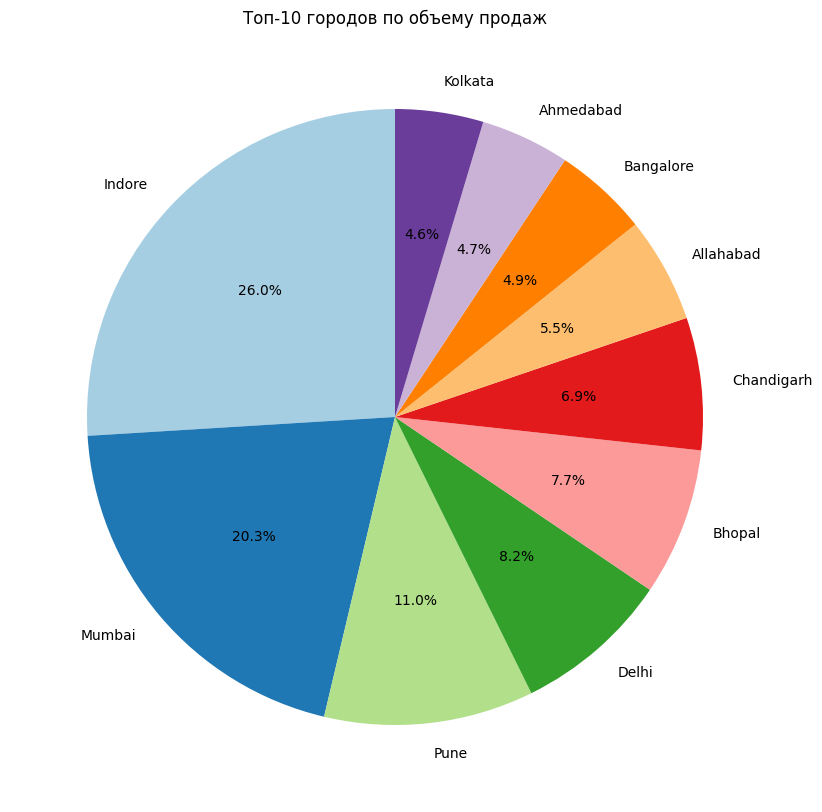

In [26]:
city_sales = merged_data.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 10))
plt.pie(city_sales, labels=city_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Топ-10 городов по объему продаж')
plt.show()

## Топ-10 городов по объему продаж могут выделить географические точки роста. Можно определить, в каких городах бизнес наиболее успешен и где следует усилить маркетинговые и продажные усилия. 

# 6. Топ-10 товаров по прибыли:

C:\Users\arkas\AppData\Local\Temp\ipykernel_36416\1255254951.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_profit_subcategories.index, y=top_profit_subcategories.values, palette='viridis')


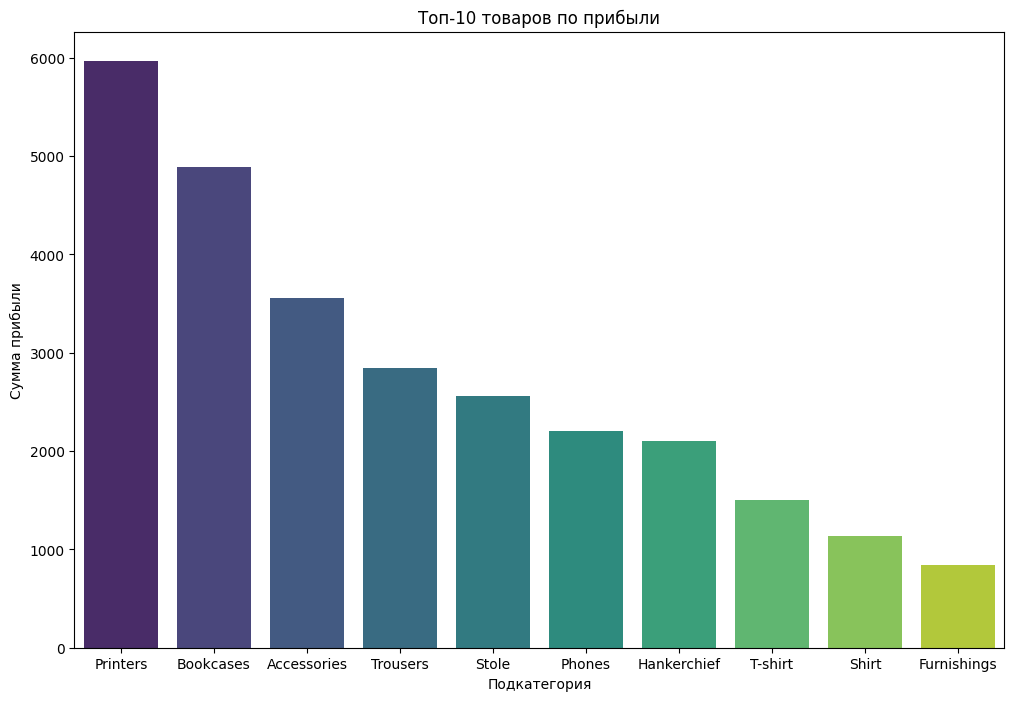

In [27]:
top_profit_subcategories = merged_data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).head(10)

# Построим столбчатую диаграмму
plt.figure(figsize=(12, 8))
sns.barplot(x=top_profit_subcategories.index, y=top_profit_subcategories.values, palette='viridis')
plt.title('Топ-10 товаров по прибыли')
plt.xlabel('Подкатегория')
plt.ylabel('Сумма прибыли')
plt.show()

## График поможет определить, на какие товары стоит направить больше средств для их продвижения в рекламных кампаниях.